1.0
1.0
2.5
2.5
2.5
0.5
0.0
0.0
0.0
0.0


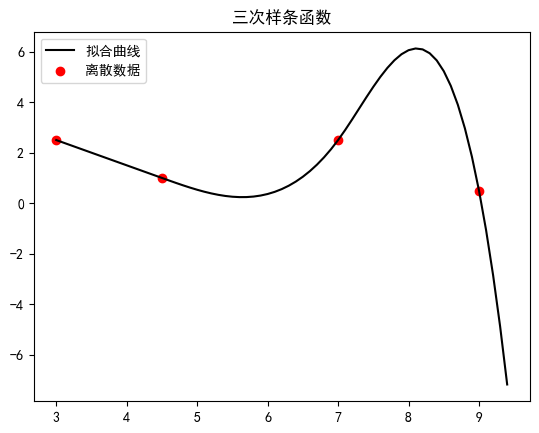

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl

"""
三次样条实现：
函数x的自变量为:3,   4.5, 7,    9
      因变量为：2.5, 1   2.5,  0.5
"""
x = [3, 4.5, 7, 9]
y = [2.5, 1, 2.5, 0.5]

"""
功能：完后对三次样条函数求解方程参数的输入
参数：要进行三次样条曲线计算的自变量
返回值：方程的参数
"""


def calculateEquationParameters(x):
    # parameter为二维数组，用来存放参数，sizeOfInterval是用来存放区间的个数
    parameter = []
    sizeOfInterval = len(x) - 1;
    i = 1
    # 首先输入方程两边相邻节点处函数值相等的方程为2n-2个方程
    while i < len(x) - 1:
        data = init(sizeOfInterval * 4)
        data[(i - 1) * 4] = x[i] * x[i] * x[i]
        data[(i - 1) * 4 + 1] = x[i] * x[i]
        data[(i - 1) * 4 + 2] = x[i]
        data[(i - 1) * 4 + 3] = 1
        data1 = init(sizeOfInterval * 4)
        data1[i * 4] = x[i] * x[i] * x[i]
        data1[i * 4 + 1] = x[i] * x[i]
        data1[i * 4 + 2] = x[i]
        data1[i * 4 + 3] = 1
        temp = data[2:]
        parameter.append(temp)
        temp = data1[2:]
        parameter.append(temp)
        i += 1
    # 输入端点处的函数值。为两个方程, 加上前面的2n - 2个方程，一共2n个方程
    data = init(sizeOfInterval * 4 - 2)
    data[0] = x[0]
    data[1] = 1
    parameter.append(data)
    data = init(sizeOfInterval * 4)
    data[(sizeOfInterval - 1) * 4] = x[-1] * x[-1] * x[-1]
    data[(sizeOfInterval - 1) * 4 + 1] = x[-1] * x[-1]
    data[(sizeOfInterval - 1) * 4 + 2] = x[-1]
    data[(sizeOfInterval - 1) * 4 + 3] = 1
    temp = data[2:]
    parameter.append(temp)
    # 端点函数一阶导数值相等为n-1个方程。加上前面的方程为3n-1个方程。
    i = 1
    while i < sizeOfInterval:
        data = init(sizeOfInterval * 4)
        data[(i - 1) * 4] = 3 * x[i] * x[i]
        data[(i - 1) * 4 + 1] = 2 * x[i]
        data[(i - 1) * 4 + 2] = 1
        data[i * 4] = -3 * x[i] * x[i]
        data[i * 4 + 1] = -2 * x[i]
        data[i * 4 + 2] = -1
        temp = data[2:]
        parameter.append(temp)
        i += 1
    # 端点函数二阶导数值相等为n-1个方程。加上前面的方程为4n-2个方程。且端点处的函数值的二阶导数为零，为两个方程。总共为4n个方程。
    i = 1
    while i < len(x) - 1:
        data = init(sizeOfInterval * 4)
        data[(i - 1) * 4] = 6 * x[i]
        data[(i - 1) * 4 + 1] = 2
        data[i * 4] = -6 * x[i]
        data[i * 4 + 1] = -2
        temp = data[2:]
        parameter.append(temp)
        i += 1
    return parameter


"""
对一个size大小的元组初始化为0
"""


def init(size):
    j = 0;
    data = []
    while j < size:
        data.append(0)
        j += 1
    return data


"""
功能：计算样条函数的系数。
参数：parametes为方程的系数，y为要插值函数的因变量。
返回值：三次插值函数的系数。
"""


def solutionOfEquation(parametes, y):
    sizeOfInterval = len(x) - 1;
    result = init(sizeOfInterval * 4 - 2)
    i = 1
    while i < sizeOfInterval:
        result[(i - 1) * 2] = y[i]
        result[(i - 1) * 2 + 1] = y[i]
        i += 1
    result[(sizeOfInterval - 1) * 2] = y[0]
    result[(sizeOfInterval - 1) * 2 + 1] = y[-1]
    a = np.array(calculateEquationParameters(x))
    b = np.array(result)
    for data_x in b:
        print(data_x)
    return np.linalg.solve(a, b)


"""
功能：根据所给参数，计算三次函数的函数值：
参数:parameters为二次函数的系数，x为自变量
返回值：为函数的因变量
"""


def calculate(paremeters, x):
    result = []
    for data_x in x:
        result.append(
            paremeters[0] * data_x * data_x * data_x + paremeters[1] * data_x * data_x + paremeters[2] * data_x +
            paremeters[3])
    return result


"""
功能：将函数绘制成图像
参数：data_x,data_y为离散的点.new_data_x,new_data_y为由拉格朗日插值函数计算的值。x为函数的预测值。
返回值：空
"""


def Draw(data_x, data_y, new_data_x, new_data_y):
    plt.plot(new_data_x, new_data_y, label="拟合曲线", color="black")
    plt.scatter(data_x, data_y, label="离散数据", color="red")
    mpl.rcParams['font.sans-serif'] = ['SimHei']
    mpl.rcParams['axes.unicode_minus'] = False
    plt.title("三次样条函数")
    plt.legend(loc="upper left")
    plt.show()


result = solutionOfEquation(calculateEquationParameters(x), y)
new_data_x1 = np.arange(3, 4.5, 0.1)
new_data_y1 = calculate([0, 0, result[0], result[1]], new_data_x1)
new_data_x2 = np.arange(4.5, 7, 0.1)
new_data_y2 = calculate([result[2], result[3], result[4], result[5]], new_data_x2)
new_data_x3 = np.arange(7, 9.5, 0.1)
new_data_y3 = calculate([result[6], result[7], result[8], result[9]], new_data_x3)
new_data_x = []
new_data_y = []
new_data_x.extend(new_data_x1)
new_data_x.extend(new_data_x2)
new_data_x.extend(new_data_x3)
new_data_y.extend(new_data_y1)
new_data_y.extend(new_data_y2)
new_data_y.extend(new_data_y3)
Draw(x, y, new_data_x, new_data_y)


new_y: [34.68460464 38.89844513 42.18022156 44.78139496 46.91272736 48.74439621]


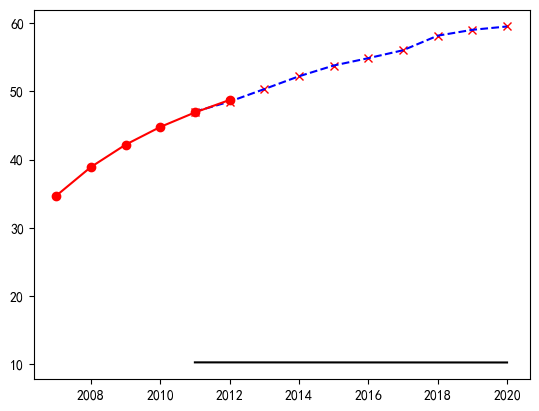

In [2]:
# 导入线多项式拟合工具：多项式拟合
import numpy as np
import matplotlib.pyplot as plt
from numpy import polyfit, poly1d,polyval

# X = np.arange(2011, 2021)
# Y = np.array([1.3, 1.36, 1.41, 1.51, 1.64, 1.64, 1.5, 1.56, 1.6, 1.63, ])
# new_x = np.array([2007, 2008, 2009, 2010, ])

# 数据准备
X = np.arange(2011, 2021)
# Y = np.array([1.3, 1.36, 1.41, 1.51, 1.64, 1.64, 1.5, 1.56, 1.6, 1.63, ])# 每一农村劳动力负担系数/人
Y = np.array([47.03,48.5,50.34,52.22,53.8,54.88,56.04,58.18,59.04,59.53,])#城镇化率/%


# Y = np.array([1.53,1.89,1.81,1.53,1.45,1.45,1.39,1.51,1.54,1.51])# 每一城镇就业者负担系数/人
new_x = np.array([2007, 2008, 2009, 2010, 2011,2012])
coeff = polyfit(X, Y,4)

new_y = polyval(coeff, new_x)
print
p = plt.plot(X, Y, 'rx')
p = plt.plot(X, coeff[0] * X + coeff[1], 'k-')
p = plt.plot(X, Y, 'b--')
p = plt.plot(new_x, new_y, 'r-o')
print(f"new_y: {new_y}")
plt.show()

# 还可以用 poly1d 生成一个以传入的 coeff 为参数的多项式函数：
# f = poly1d(coeff)
# p = plt.plot(x, noise_y, 'rx')
# p = plt.plot(x, f(x))

y1: 263520.5
 y2: 279440.01353473257
 y3: 281068.00763807294
 y4:286401.8424211871


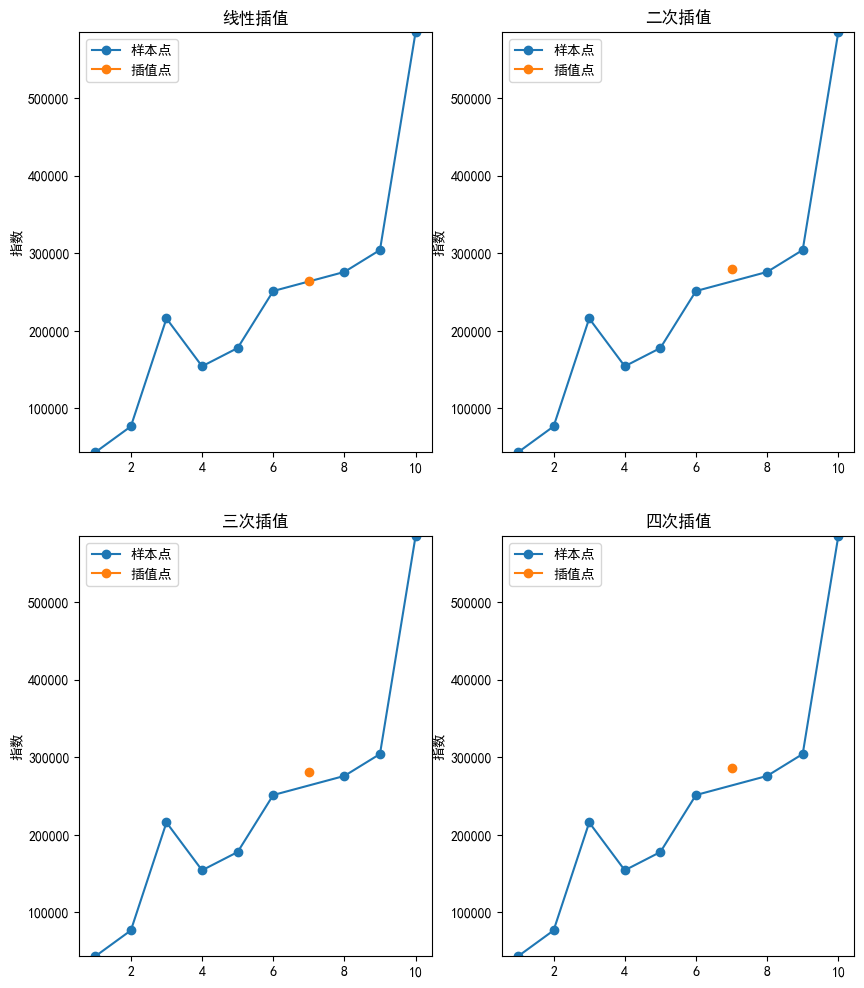

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 数据准备
X = np.array([1,2,3,4,5,6,8,9,10])
# Y = np.array([1.3, 1.36, 1.41, 1.51, 1.64, 1.64, 1.5, 1.56, 1.6, 1.63, ])# 每一农村劳动力负担系数/人
# Y = np.array([2.985893417,3.044124817,3.037618942,2.945852535,2.826456895,2.701214575,2.232150227,2.189968478,2.167940228,2.173708552,2.169715815,2.157810627,2.151906481,2.109799224,2.065689271,])#城乡居民收入倍差/比值
Y = np.array([43400,
76767,
215843,
154233,
177764,
251214,

275827,
304091,
584696,
])#城镇化率/%

# Y = np.array([1.53,1.89,1.81,1.53,1.45,1.45,1.39,1.51,1.54,1.51])# 每一城镇就业者负担系数/人


new_x = np.array(7)

import scipy.interpolate as spi

ipo1 = spi.splrep(X, Y, k=1)
y1 = spi.splev(new_x, ipo1)

ipo2 = spi.splrep(X, Y, k=2)
y2 = spi.splev(new_x, ipo2)

ipo3 = spi.splrep(X, Y, k=3)
y3 = spi.splev(new_x, ipo3)

ipo4 = spi.splrep(X, Y, k=4)
y4 = spi.splev(new_x, ipo4)
print(f"y1: {y1}\n y2: {y2}\n y3: {y3}\n y4:{y4}")
fig, axes = plt.subplots(2, 2, figsize=(10, 12))
ax1, ax2 = axes[0, :]  # 获取第一行的两个Axes
ax3, ax4 = axes[1, :]  # 获取第二行的两个Axes

# 画图

ax1.plot(X, Y, '-o', label='样本点')
ax1.plot(new_x, y1, '-o', label='插值点')
ax1.set_ylim(Y.min() - 1, Y.max() + 1)
ax1.set_ylabel('指数')
ax1.set_title('线性插值')
ax1.legend()

ax2.plot(X, Y, '-o', label='样本点')
ax2.plot(new_x, y2, '-o', label='插值点')
ax2.set_ylim(Y.min() - 1, Y.max() + 1)
ax2.set_ylabel('指数')
ax2.set_title('二次插值')
ax2.legend()

ax3.plot(X, Y, '-o', label='样本点')
ax3.plot(new_x, y3, '-o', label='插值点')
ax3.set_ylim(Y.min() - 1, Y.max() + 1)
ax3.set_ylabel('指数')
ax3.set_title('三次插值')
ax3.legend()

ax4.plot(X, Y, '-o', label='样本点')
ax4.plot(new_x, y4, '-o', label='插值点')
ax4.set_ylim(Y.min() - 1, Y.max() + 1)
ax4.set_ylabel('指数')
ax4.set_title('四次插值')
ax4.legend()

plt.show()


     --------------------------------------- 34.1/34.1 MB 42.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
